Unsupervised learning : ASSIGNMENT 2


In [ ]:
import pandas as pd 
import seaborn as sns


In [2]:
df = pd.read_csv('IMDB Dataset.csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


We want to check the null values . As the result , there is no null values on the dataset .

In [3]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

As the result appear the positive and negative sentiments have the same distribution .

In [4]:
df['sentiment'].value_counts()


sentiment
positive    25000
negative    25000
Name: count, dtype: int64

AS appears here the count of reviews is 50000 review and the average length of reviews is 231 review .

In [5]:
df['text_length'] = df['review'].apply(lambda x: len(x.split()))
df['text_length'].describe()


count    50000.000000
mean       231.156940
std        171.343997
min          4.000000
25%        126.000000
50%        173.000000
75%        280.000000
max       2470.000000
Name: text_length, dtype: float64

Convert text into numerical features using TF-IDF.

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000, stop_words="english")
X_tfidf = vectorizer.fit_transform(df['review'])


Apply clustering algorithms and find optimal hyperparameters.

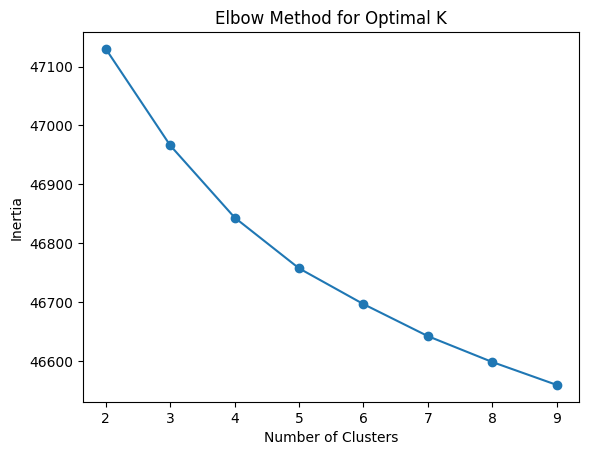

In [9]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Find optimal clusters using the Elbow method
inertia = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_tfidf)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.plot(range(2, 10), inertia, marker="o")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.show()


Choose the best fit K 

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(X_tfidf)



0        4
1        4
2        4
3        4
4        4
        ..
49995    1
49996    4
49997    4
49998    3
49999    1
Name: cluster, Length: 50000, dtype: int32


In [15]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5, metric="cosine")
df['dbscan_cluster'] = dbscan.fit_predict(X_tfidf)
df['dbscan_cluster'] 


0       -1
1       -1
2       -1
3       -1
4       -1
        ..
49995   -1
49996   -1
49997   -1
49998   -1
49999   -1
Name: dbscan_cluster, Length: 50000, dtype: int64

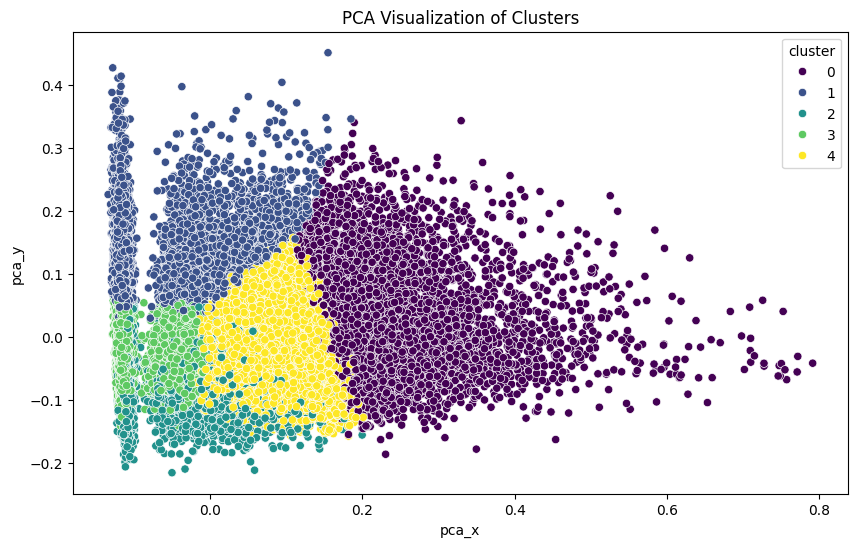

In [13]:
from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_tfidf.toarray())

df['pca_x'] = X_pca[:, 0]
df['pca_y'] = X_pca[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(x="pca_x", y="pca_y", hue="cluster", data=df, palette="viridis")
plt.title("PCA Visualization of Clusters")
plt.show()
